11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 198ms/step - loss: 0.2619 - val_loss: 0.0832
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 199ms/step - loss: 0.0800 - val_loss: 0.0769
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - loss: 0.0754 - val_loss: 0.0744
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 202ms/step - loss: 0.0734 - val_loss: 0.0729
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 201ms/step - loss: 0.0720 - val_loss: 0.0719
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - loss: 0.0712 - val_loss: 0.0714
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 198ms/step - loss: 0.0706 - val_loss: 0.0708
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 201ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 199ms/step - loss: 0.0696 - val_loss: 0.0699
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 202ms/step - loss: 0.0693 - val_loss: 0.0697
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━

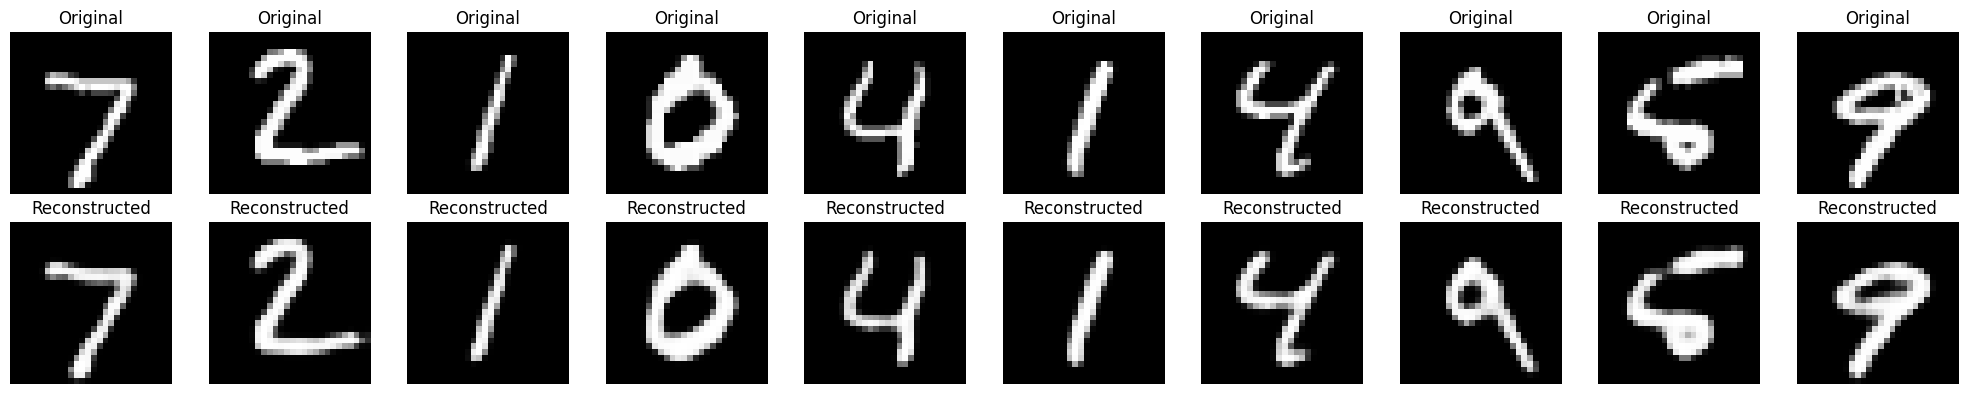

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

encoder_input = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_input)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D(2, padding="same")(x)  # [B, 7, 7, 16]

x = layers.Conv2D(16, 3, activation="relu", padding="same")(encoded)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)  # back to [28, 28, 1]

autoencoder = keras.Model(encoder_input, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_split=0.1)
encoder = keras.Model(encoder_input, encoded)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()